# Pandas

In [ ]:
import pandas as pd
import numpy as np

## Создание объектов

In [ ]:
arr = [1, 2, 3, 4]
print(arr)
print("type(arr): {}".format(type(arr)))

[1, 2, 3, 4]
type(arr): <class 'list'>


Для создания одномерного массива в Pandas существует объект `Series`. Чтобы его создать, надо вызвать конструктор `pandas.Series()` и передать ему `list` Python.

In [ ]:
s = pd.Series([1, 2, 3, 4])
print(s)

0    1
1    2
2    3
3    4
dtype: int64


In [ ]:
s = pd.Series([1, 2, "hello", np.nan, 4]) # Series может состоять из разнородных объектов
print(s)

0        1
1        2
2    hello
3      NaN
4        4
dtype: object


Для двумерных матриц существует объект `DataFrame`. Он имеет функционал таблицы - в выводе вы увидите индексы и названия колонок (пока цифры, по умолчанию).

In [ ]:
df = pd.DataFrame([[50, 4, 30], [48, 10, 26], [61, 8, 24]])
df

,0,1,2
0,50,4,30
1,48,10,26
2,61,8,24


Особенность Jupyter - не стоит использовать print(df), вывод будет не таким красивым.

In [ ]:
print(df)

    0   1   2
0  50   4  30
1  48  10  26
2  61   8  24


`list` Python и массив NumPy такими свойствами не обладают.

In [ ]:
simple_arr = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
numpy_arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(simple_arr)
print(numpy_arr)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


Чтобы добавить свои индексы и названия колонок, используйте параметры `index` и `columns` соответственно.

In [ ]:
s.columns

AttributeError: ignored

In [ ]:
s = pd.DataFrame([[45, 2, 33], [34, 4, 16], [28, 10, 19]], index=[2016, 2017, 2018], columns=['Cars', 'Trucks', 'Bikes'])
s

,Cars,Trucks,Bikes
2016,45,2,33
2017,34,4,16
2018,28,10,19


Если передать неправильные размерности, `DataFrame` создать не получится.

In [ ]:
a = np.random.randn(5, 6) # размерность матрицы случайных чисел - 5х6
df = pd.DataFrame(a, index=[2016, 2017, 2018], columns=['A', 'B', 'C']) # длина списка индексов и названий колонок - 3
# получаем закономерную ошибку

ValueError: ignored

In [ ]:
df = pd.DataFrame(a, index=[2014, 2015, 2016, 2017, 2018], columns=['A', 'B', 'C', 'D', 'E', 'F'])
df

,A,B,C,D,E,F
2014,1.121054,-0.517473,0.486446,-0.155678,1.260921,-0.867826
2015,-0.844776,0.023201,-0.940306,1.402079,-1.147230,-0.592537
2016,-0.239336,-2.306615,0.127206,1.789415,2.356311,-1.285048
2017,-0.299513,-0.360656,0.307658,1.203965,2.244312,1.555957
2018,1.382192,1.439240,-1.956964,-0.742197,1.306576,0.694000


Создадим более осмысленную таблицу - данные магазина книг. В ней будет содержаться сумма, потраченной клиентом за прошлый год (в долларах), его фамилия и шанс того, что он вернётся за покупками ещё раз (от 0 до 1).

In [ ]:
a = [
    [100, 'Brown', 0.483],
    [220, 'Smith', 0.564],
    [66, 'Noll', 0.181]
]
df = pd.DataFrame(a, columns=['Items bought', 'Last name', 'More purchases chance'])
df

,Items bought,Last name,More purchases chance
0,100,Brown,0.483
1,220,Smith,0.564
2,66,Noll,0.181


## Визуализация и первичная обработка

Расширим таблицу - теперь DataFrame содержит сумму, потраченной клиентом за прошлый год (в долларах), его фамилию, пол, возраст и шанс того, что он вернётся за покупками ещё раз (от 0 до 1).

In [ ]:
a = [
    [100, 'Brown', 'm', 45, 0.483],
    [220, 'Smith', 'f', 30, 0.564],
    [66, 'Noll', 'm', 58, 0.181],
    [156, 'Johnson', 'm', 18, 0.503],
    [0, 'Krakovsky', 'f', 50, 0.9],
    [300, 'Brann', 'm', 55, 0.862],
    [42, 'Alba', 'f', 32, 0.455],
    [105, 'Perrez', 'f', 24, 0.381]
]
df = pd.DataFrame(a, columns=['Sum spent', 'Last name', 'Gender', 'Age', 'Later purchases chance'])
df

,Sum spent,Last name,Gender,Age,Later purchases chance
0,100,Brown,m,45,0.483
1,220,Smith,f,30,0.564
2,66,Noll,m,58,0.181
3,156,Johnson,m,18,0.503
4,0,Krakovsky,f,50,0.900
5,300,Brann,m,55,0.862
6,42,Alba,f,32,0.455
7,105,Perrez,f,24,0.381


Чтобы вывести первые пять рядов, воспользуйтесь функцией `DataFrame.head()`.

In [ ]:
print(df.head())

   Sum spent  Last name Gender  Age  Later purchases chance
0        100      Brown      m   45                   0.483
1        220      Smith      f   30                   0.564
2         66       Noll      m   58                   0.181
3        156    Johnson      m   18                   0.503
4          0  Krakovsky      f   50                   0.900


Чтобы вывести последние пять рядов, воспользуйтесь функцией `DataFrame.tail()`.

In [ ]:
df.tail()

,Sum spent,Last name,Gender,Age,Later purchases chance
3,156,Johnson,m,18,0.503
4,0,Krakovsky,f,50,0.900
5,300,Brann,m,55,0.862
6,42,Alba,f,32,0.455
7,105,Perrez,f,24,0.381


Чтобы вывести определённое количество (`n`) рядов, воспользуйтесь функцией `DataFrame.head(n)` или `DataFrame.tail(n)`.

In [ ]:
df.head(3)

,Sum spent,Last name,Gender,Age,Later purchases chance
0,100,Brown,m,45,0.483
1,220,Smith,f,30,0.564
2,66,Noll,m,58,0.181


In [ ]:
df.tail(2)

,Sum spent,Last name,Gender,Age,Later purchases chance
6,42,Alba,f,32,0.455
7,105,Perrez,f,24,0.381


Чтобы узнать размерность `DataFrame`, используйте свойство `DataFrmame.shape` (как в NumPy).

In [ ]:
df.shape

(8, 5)

Чтобы получить список названий колонок, используйте свойство `DataFrame.columns`.

In [ ]:
df.columns

Index(['Sum spent', 'Last name', 'Gender', 'Age', 'Later purchases chance'], dtype='object')

Чтобы получить список индексов, используйте свойство `DataFrame.index`.

In [ ]:
df.index

RangeIndex(start=0, stop=8, step=1)

Для первичного анализа таблицы используйте метод `DataFrame.describe()`

In [ ]:
df.describe()

,Sum spent,Age,Later purchases chance
count,8.000000,8.000000,8.000000
mean,123.625000,39.000000,0.541125
std,98.282301,14.976172,0.239002
min,0.000000,18.000000,0.181000
25%,60.000000,28.500000,0.436500
50%,102.500000,38.500000,0.493000
75%,172.000000,51.250000,0.638500
max,300.000000,58.000000,0.900000


In [ ]:
df.T # транспонирование матрицы - не очень популярный для DataFrame метод

,0,1,2,3,4,5,6,7
Sum spent,100,220,66,156,0,300,42,105
Last name,Brown,Smith,Noll,Johnson,Krakovsky,Brann,Alba,Perrez
Gender,m,f,m,m,f,m,f,f
Age,45,30,58,18,50,55,32,24
Later purchases chance,0.483,0.564,0.181,0.503,0.9,0.862,0.455,0.381


Для сортировки используйте метод `DataFrame.sort_values(by='column_name')`, где `column_name` - имя столбца, по которому будет проходить сортировка.

In [ ]:
df.sort_values(by='Age')

,Sum spent,Last name,Gender,Age,Later purchases chance
3,156,Johnson,m,18,0.503
7,105,Perrez,f,24,0.381
1,220,Smith,f,30,0.564
6,42,Alba,f,32,0.455
0,100,Brown,m,45,0.483
4,0,Krakovsky,f,50,0.900
5,300,Brann,m,55,0.862
2,66,Noll,m,58,0.181


Для сортировки по убыванию установите параметр `ascending` в значение `False`.

In [ ]:
df.sort_values(by='Age', ascending=False)

,Sum spent,Last name,Gender,Age,Later purchases chance
2,66,Noll,m,58,0.181
5,300,Brann,m,55,0.862
4,0,Krakovsky,f,50,0.900
0,100,Brown,m,45,0.483
6,42,Alba,f,32,0.455
1,220,Smith,f,30,0.564
7,105,Perrez,f,24,0.381
3,156,Johnson,m,18,0.503


## Выбор данных из DataFrame

Создадим заново расширенную таблицу магазина книг.

In [ ]:
a = [
    [100, 'Brown', 'm', 45, 48.3],
    [220, 'Smith', 'f', 30, 56.4],
    [66, 'Noll', 'm', 58, 18.1],
    [156, 'Johnson', 'm', 18, 50.3],
    [0, 'Krakovsky', 'f', 50, 9.0],
    [300, 'Brann', 'm', 55, 86.2],
    [42, 'Alba', 'f', 32, 45.5],
    [105, 'Perrez', 'f', 24, 38.1]
]
df = pd.DataFrame(a, columns=['Sum spent', 'Last name', 'Gender', 'Age', 'Later purchases chance'])
df

,Sum spent,Last name,Gender,Age,Later purchases chance
0,100,Brown,m,45,48.3
1,220,Smith,f,30,56.4
2,66,Noll,m,58,18.1
3,156,Johnson,m,18,50.3
4,0,Krakovsky,f,50,9.0
5,300,Brann,m,55,86.2
6,42,Alba,f,32,45.5
7,105,Perrez,f,24,38.1


Чтобы получить отдельный столбец, укажите его имя в квадратных скобках.

In [ ]:
df['Gender']

0    m
1    f
2    m
3    m
4    f
5    m
6    f
7    f
Name: Gender, dtype: object

Чтобы выбрать несколько колонок, передайте их списком Python.

In [ ]:
df['Gender', 'Age'] # так не получится - Pandas требует единую сущность как индекс

KeyError: ignored

In [ ]:
df

,Sum spent,Last name,Gender,Age,Later purchases chance
0,100,Brown,m,45,0.483
1,220,Smith,f,30,0.564
2,66,Noll,m,58,0.181
3,156,Johnson,m,18,0.503
4,0,Krakovsky,f,50,0.900
5,300,Brann,m,55,0.862
6,42,Alba,f,32,0.455
7,105,Perrez,f,24,0.381


In [ ]:
df[['Gender', 'Age']] # так получится, так как ['Gender', 'Age'] - единая сущность

,Gender,Age
0,m,45
1,f,30
2,m,58
3,m,18
4,f,50
5,m,55
6,f,32
7,f,24


In [ ]:
df['new_column'] = df['Age'] * 2

Для выбора строки необходимо использовать метод `DataFrame.iloc[n]`, где `n` - порядковый номер ряда (начиная с 0), не название индексаю

In [ ]:
df[0] # так не работает

KeyError: ignored

In [ ]:
df.iloc[0] # так работает

Sum spent                   100
Last name                 Brown
Gender                        m
Age                          45
Later purchases chance     48.3
Name: 0, dtype: object

In [ ]:
df.iloc[0:4] # выбор рядов с индексами 0, 1, 2, 3

,Sum spent,Last name,Gender,Age,Later purchases chance,new_column
0,100,Brown,m,45,48.3,90
1,220,Smith,f,30,56.4,60
2,66,Noll,m,58,18.1,116
3,156,Johnson,m,18,50.3,36


Существует также функция `DataFrame.loc[n]`, которая принимает названия индексов, а не их порядковый номер.

In [ ]:
temp_df = pd.DataFrame([[1, 2], [2, 3], [3, 4]], index=[2016, 2017, 2018])
# temp_df.iloc[2017] - не сработает
temp_df.loc[2017] # аналогично temp_df.iloc[1]

0    2
1    3
Name: 2017, dtype: int64

Методы можно комбинировать в любом порядке.

In [ ]:
df[['Last name', 'Gender']].loc[[0, 1, 2]]

,Last name,Gender
0,Brown,m
1,Smith,f
2,Noll,m


In [ ]:
df.loc[[0, 1, 2]][['Last name', 'Gender']]

,Last name,Gender
0,Brown,m
1,Smith,f
2,Noll,m


Чтобы выбрать из `DataFrame` только ряды, удовлетворяющие логическому выражению (например, только клиенты женского пола), передайте в квадратные скобки это логическое выражение (в данном случае - стоит ли в колонке `'Age'` буква `'f'`.

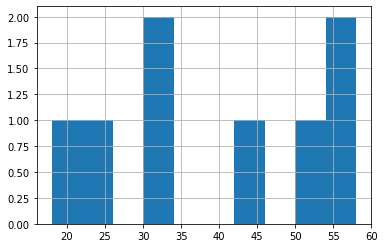

In [ ]:
df['Age'].hist()

In [ ]:
df[df['Gender'] == 'f']

,Sum spent,Last name,Gender,Age,Later purchases chance,new_column
1,220,Smith,f,30,56.4,60
4,0,Krakovsky,f,50,9.0,100
6,42,Alba,f,32,45.5,64
7,105,Perrez,f,24,38.1,48


In [ ]:
df[df['Age'] > 30] # клиенты старше 30 лет

,Sum spent,Last name,Gender,Age,Later purchases chance,new_column
0,100,Brown,m,45,48.3,90
2,66,Noll,m,58,18.1,116
4,0,Krakovsky,f,50,9.0,100
5,300,Brann,m,55,86.2,110
6,42,Alba,f,32,45.5,64


In [ ]:
df[df['Age'] <= 30] # клиенты не старше 30 лет

,Sum spent,Last name,Gender,Age,Later purchases chance,new_column
1,220,Smith,f,30,56.4,60
3,156,Johnson,m,18,50.3,36
7,105,Perrez,f,24,38.1,48


## Сохранение данных

Чтобы загрузить `.csv` файл в `DataFrame`, используйте функцию `pandas.read_csv('file_name.csv')`

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Чтобы сохранить `DataFrame` в файл, используйте метод `pandas.to_csv('file_name.csv')`

In [ ]:
df.to_csv('test_file.csv', index=False)